# **1. Import libraries and load data**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read the data
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/summer-products-with-rating-and-performance_2020-08.csv')

# **2. Explore and preprocess the dataset**

In [2]:
# Print the first few rows
print('First few rows of the dataset:\n', data.head())

# Get information about the dataset
print('\nInformation about the dataset:\n')
print(data.info())

# Get summary statistics of the numerical columns
print('\nSummary statistics of the numerical columns:\n')
print(data.describe())

# Get the number of unique values in each column
print('\nNumber of unique values in each column:\n')
print(data.nunique())

# Add a new column for revenue
data["revenue"] = data["units_sold"] * data["price"]

# Categorize revenue bins using a function
def bins(x):
    for bar in range(20000, 820000, 20000):
        if x <= bar:
            return bar

# Create a new column to apply the bin function
data["rev_dist"] = data["revenue"].apply(lambda x: bins(x))

# Add a count column for pivot table
data["count"] = 1

First few rows of the dataset:
                                                title  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   
1  SSHOUSE Summer Casual Sleeveless Soirée Party ...   
2  2020 Nouvelle Arrivée Femmes Printemps et Été ...   
3  Hot Summer Cool T-shirt pour les femmes Mode T...   
4  Femmes Shorts d'été à lacets taille élastique ...   

                                          title_orig  price  retail_price  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...  16.00            14   
1   Women's Casual Summer Sleeveless Sexy Mini Dress   8.00            22   
2  2020 New Arrival Women Spring and Summer Beach...   8.00            43   
3  Hot Summer Cool T Shirt for Women Fashion Tops...   8.00             8   
4  Women Summer Shorts Lace Up Elastic Waistband ...   2.72             3   

  currency_buyer  units_sold  uses_ad_boosts  rating  rating_count  \
0            EUR         100               0    3.76            54   
1            EUR       20000

# **3. Create pivot table and apply K-Means Clustering**

In [3]:
# Create a pivot table of the revenue distributions
pivot_table = pd.pivot_table(data, index=["rev_dist"], values=["count"], aggfunc=np.sum)

# Apply K-Means Clustering algorithm
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(pivot_table)

# Add a new column to the pivot table for the model classification
pivot_table["category"] = kmeans.labels_

# Create dictionary to classify each line for ABC task
ABC_dict = {    
    0: "A",
    1: "C",
    2: "B"
}

# Add new column to pivot table for ABC classification
pivot_table["ABC"] = pivot_table["category"].apply(lambda x: ABC_dict[x])

# **4. Merge pivot table with main dataframe and display the result**

In [4]:
# Merge pivot table with main dataframe to assign ABC classification to each element
data = pd.merge(data, pivot_table, on="rev_dist", how="left")

# Select fewer relevant columns
selected_columns = ['title', 'price', 'units_sold', 'revenue', 'ABC']
data_selected = data[selected_columns]

# Rename columns for better understanding
column_names = {
    'title': 'Product Title',
    'price': 'Price',
    'units_sold': 'Units Sold',
    'revenue': 'Revenue',
    'ABC': 'ABC Classification'
}

data_selected = data_selected.rename(columns=column_names)

# Truncate product titles
max_title_length = 30
data_selected['Product Title'] = data_selected['Product Title'].apply(lambda x: x[:max_title_length] + '...' if len(x) > max_title_length else x)

# Change display settings for pandas
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.width', None)

# Display the first few rows of the updated dataset in a tabular format
print('\nUpdated dataset with ABC classification:')
print(data_selected.head().to_string(index=False))


Updated dataset with ABC classification:
                    Product Title  Price  Units Sold  Revenue ABC Classification
2020 Summer Vintage Flamingo P...  16.00         100   1600.0                  C
SSHOUSE Summer Casual Sleevele...   8.00       20000 160000.0                  A
2020 Nouvelle Arrivée Femmes P...   8.00         100    800.0                  C
Hot Summer Cool T-shirt pour l...   8.00        5000  40000.0                  B
Femmes Shorts d'été à lacets t...   2.72         100    272.0                  C


# **5. Data Visualization**

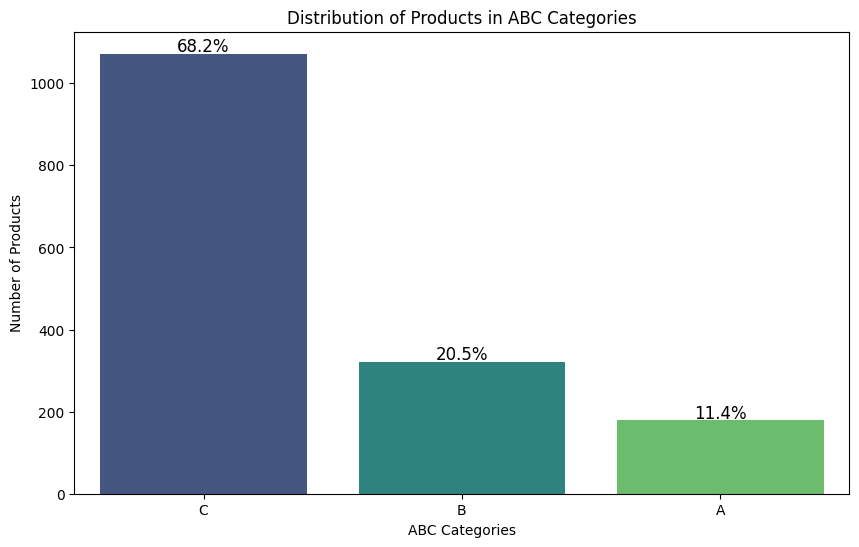

In [5]:
# Count the number of products in each ABC category
abc_counts = data_selected['ABC Classification'].value_counts()

# Calculate the percentages of products in each category
total_products = abc_counts.sum()
abc_percentages = (abc_counts / total_products) * 100

# Create a bar plot of the ABC categories
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=abc_counts.index, y=abc_counts.values, palette='viridis')

# Add percentages above the bars
for i, value in enumerate(abc_counts.values):
    percentage = f"{abc_percentages[i]:.1f}%"
    plt.text(i, value + 5, percentage, ha='center', va='baseline', fontsize=12)

plt.title('Distribution of Products in ABC Categories')
plt.xlabel('ABC Categories')
plt.ylabel('Number of Products')
plt.show()

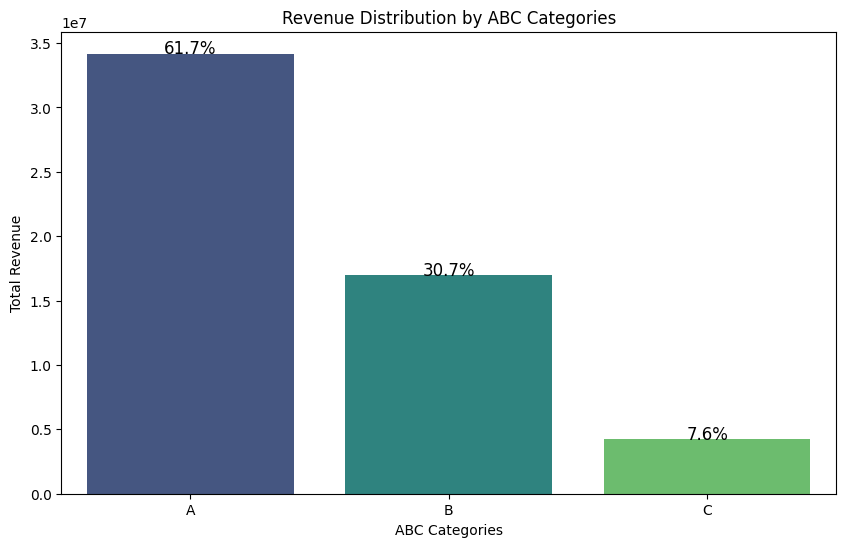

In [6]:
# Calculate the total revenue for each ABC category
revenue_by_category = data_selected.groupby('ABC Classification')['Revenue'].sum()

# Calculate the percentages of revenue for each category
total_revenue = revenue_by_category.sum()
revenue_percentages = (revenue_by_category / total_revenue) * 100

# Create a bar plot of the revenue by ABC categories
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette='viridis')

# Add revenue percentages above the bars
for i, value in enumerate(revenue_by_category.values):
    percentage = f"{revenue_percentages[i]:.1f}%"
    plt.text(i, value + 5, percentage, ha='center', va='baseline', fontsize=12)

plt.title('Revenue Distribution by ABC Categories')
plt.xlabel('ABC Categories')
plt.ylabel('Total Revenue')
plt.show()

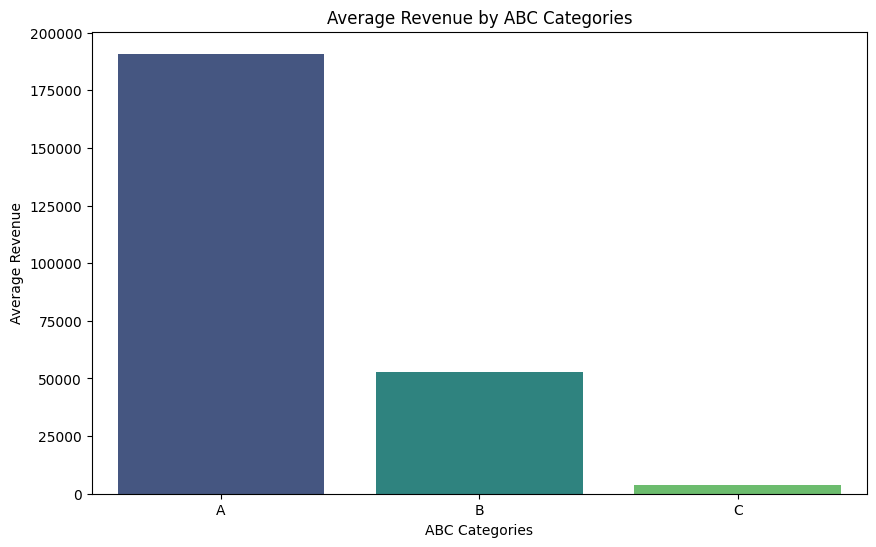

In [ ]:
# Calculate the average revenue for each ABC category
average_revenue_by_category = data_selected.groupby('ABC Classification')['Revenue'].mean()

# Create a bar plot of the average revenue by ABC categories
plt.figure(figsize=(10, 6))
sns.barplot(x=average_revenue_by_category.index, y=average_revenue_by_category.values, palette='viridis')

plt.title('Average Revenue by ABC Categories')
plt.xlabel('ABC Categories')
plt.ylabel('Average Revenue')
plt.show()